In [24]:
%matplotlib inline
from __future__ import print_function
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from pprint import pprint
digits = load_digits() # http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
X = digits.data
y = digits.target
# pprint(X, compact = True)
# pprint(y)
# digits 
# Just examining data. Commented out because of lack of real estate

In [9]:
ones = [X[i] for i in range(len(y)) if y[i] == 1]
zeroes = [X[i] for i in range(len(y)) if y[i] == 0]

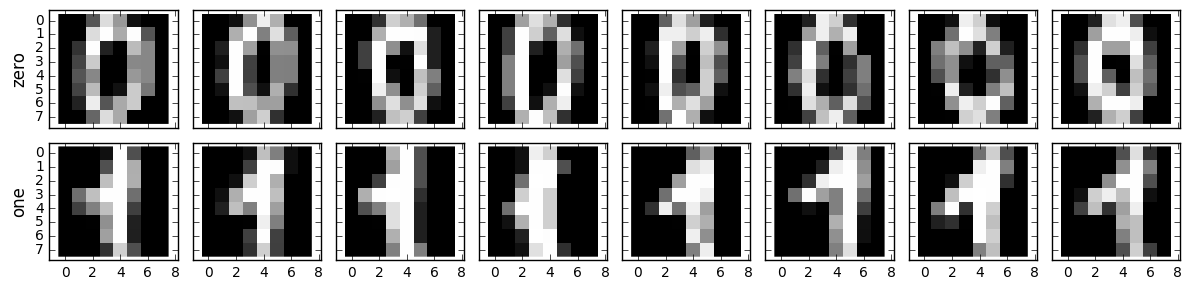

In [10]:
def plot_mosaic(a, b):
    f, ax = plt.subplots(2, 8, sharex=True, sharey=True)
    f.set_size_inches(12, 3)
    ax[0,0].set_ylabel('zero', size='large')
    ax[1,0].set_ylabel('one', size='large')
    for i in range(8):
        ax[0, i].imshow(a[i].reshape(8, 8), cmap='gray', interpolation='none')
    for i in range(8, 16):
        ax[1,i % 8].imshow(b[i].reshape(8, 8), cmap='gray', interpolation='none')
    f.tight_layout()
    
plot_mosaic(zeroes, ones)

In [13]:
from sklearn.decomposition import PCA
both = [X[i] for i in range(len(y)) if y[i] == 0 or y[i] == 1]
labels = [_ for _ in y if _ == 0 or _ == 1]
pca = PCA(n_components = 3)
Xproj3d = pca.fit_transform(both)
print(Xproj3d[labels.index(0)])
Xproj3d

[-24.84615349  -0.89358165   0.58202371]


array([[-24.84615349,  -0.89358165,   0.58202371],
       [ 30.66310441,  -0.59384848,  -1.41944624],
       [-17.33460726,  -1.15844127,  -7.91068157],
       ..., 
       [-11.30249199, -12.70038879,  -0.89638029],
       [ 17.69438032,  -4.98647743, -15.91874413],
       [-23.25253527,  -1.14235758,  -9.17561739]])

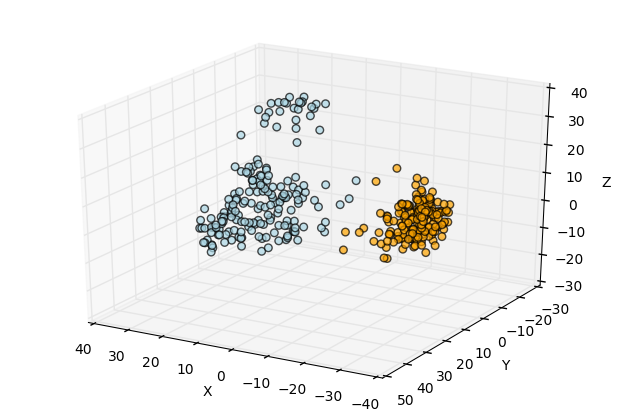

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax3d = Axes3D(fig)
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
ax3d.view_init(elev=25., azi
               m=120)
colors = ['orange' if y == 0 else 'lightblue' for y in labels]
ax3d.scatter(Xproj3d.T[0], Xproj3d.T[1], Xproj3d.T[2], c=colors, s=30, alpha=0.7)

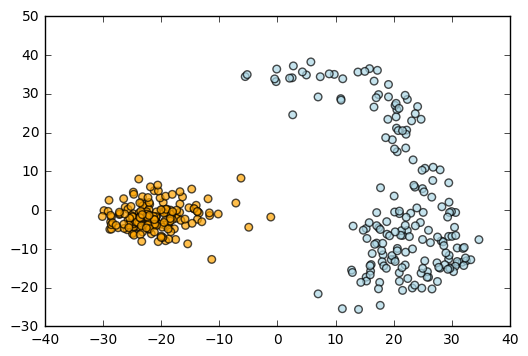

In [16]:
pca = PCA(n_components=2)
Xproj2d = pca.fit_transform(both)
plt.scatter(Xproj2d.T[0], Xproj2d.T[1], c=colors, s=30, alpha=0.7)
# https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.1-Dimensionality-PCA.ipynb

In [27]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target 
# TODO: Figure out how to use PCA on this dataset